# *GOOGLE STOCK PRICE PREDICTION*

## Time Series Analysis using ARIMA and SARIMA Model

In [1]:
#Import the necessary libraries and modules
import numpy as np
import pandas as pd
from plotly import graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the datatset
data = pd.read_csv(r"C:\Users\Twinkle Sahni\Downloads\GOOG.csv")
data

Date         Open         High          Low        Close  \
0    2021-06-30  2513.071045  2516.000000  2495.149902  2506.320068   
1    2021-07-01  2496.995117  2529.250000  2496.995117  2527.370117   
2    2021-07-02  2536.790039  2576.959961  2535.379883  2574.379883   
3    2021-07-06  2588.989990  2597.689941  2568.179932  2595.419922   
4    2021-07-07  2606.820068  2612.798096  2595.199951  2601.550049   
..          ...          ...          ...          ...          ...   
247  2022-06-23  2259.000000  2263.929932  2220.580078  2253.689941   
248  2022-06-24  2272.060059  2372.750000  2272.060059  2370.760010   
249  2022-06-27  2378.699951  2385.000000  2320.014893  2332.449951   
250  2022-06-28  2327.020020  2357.129883  2248.879883  2251.429932   
251  2022-06-29  2242.969971  2273.290039  2231.080078  2245.129883   

       Adj Close   Volume  
0    2506.320068  1200300  
1    2527.370117   856000  
2    2574.379883  1058000  
3    2595.419922  1067500  
4    2601.550049   834000  
..           ...      ...  
247  2253.689941  1235500  
248  2370.760010  1954700  
249  2332.449951  1642000  
250  2251.429932  1411600  
251  2245.129883   927500  

[252 rows x 7 columns]

## Explanatory Data Analysis

In [3]:
data.describe().T

count          mean            std            min            25%  \
Open       252.0  2.687877e+03     231.160125    2102.840088    2598.942444   
High       252.0  2.716666e+03     224.851525    2127.899902    2619.908753   
Low        252.0  2.657017e+03     232.038512    2044.160034    2551.157532   
Close      252.0  2.686044e+03     228.845602    2116.790039    2585.010071   
Adj Close  252.0  2.686044e+03     228.845602    2116.790039    2585.010071   
Volume     252.0  1.316277e+06  538084.808281  593300.000000  944900.000000   

                    50%           75%           max  
Open       2.742252e+03  2.864473e+03  3.037270e+03  
High       2.768175e+03  2.886227e+03  3.042000e+03  
Low        2.714890e+03  2.834732e+03  2.997750e+03  
Close      2.740405e+03  2.856075e+03  3.014180e+03  
Adj Close  2.740405e+03  2.856075e+03  3.014180e+03  
Volume     1.196900e+06  1.531525e+06  4.487500e+06

In [4]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
data.corr

<bound method DataFrame.corr of            Date         Open         High          Low        Close  \
0    2021-06-30  2513.071045  2516.000000  2495.149902  2506.320068   
1    2021-07-01  2496.995117  2529.250000  2496.995117  2527.370117   
2    2021-07-02  2536.790039  2576.959961  2535.379883  2574.379883   
3    2021-07-06  2588.989990  2597.689941  2568.179932  2595.419922   
4    2021-07-07  2606.820068  2612.798096  2595.199951  2601.550049   
..          ...          ...          ...          ...          ...   
247  2022-06-23  2259.000000  2263.929932  2220.580078  2253.689941   
248  2022-06-24  2272.060059  2372.750000  2272.060059  2370.760010   
249  2022-06-27  2378.699951  2385.000000  2320.014893  2332.449951   
250  2022-06-28  2327.020020  2357.129883  2248.879883  2251.429932   
251  2022-06-29  2242.969971  2273.290039  2231.080078  2245.129883   

       Adj Close   Volume  
0    2506.320068  1200300  
1    2527.370117   856000  
2    2574.379883  1058000  
3  

<AxesSubplot:>

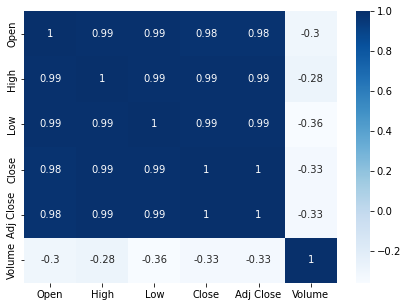

In [6]:
plt.figure(figsize=(7,5))
sns.heatmap(data=data.corr(), cmap='Blues', annot=True)

**From the above heatmap, we can observe large number of values equal and close to 1. This indicated the high positive correlations among the variables which could be possible because there is very small difference between oepn, high, low and close values of a stock price. However, this minute differences are profit or loss generating forces in the stock market. So, for further investigations, we can add new variables measuring these differences between variables and look how those are interrelated.**

In [7]:
data2 = data.copy()

In [8]:
data2['open-high'] = data['Open']-data['High']
data2['open-low'] = data['Open'] - data['Low']
data2['close-high'] = data['Close']-data['High']
data2['close-low'] = data['Close'] - data['Low']
data2['high-low'] = data['High'] - data['Low']
data2['open-close'] = data['Open'] - data['Close']
data2.head()

Date         Open         High          Low        Close  \
0  2021-06-30  2513.071045  2516.000000  2495.149902  2506.320068   
1  2021-07-01  2496.995117  2529.250000  2496.995117  2527.370117   
2  2021-07-02  2536.790039  2576.959961  2535.379883  2574.379883   
3  2021-07-06  2588.989990  2597.689941  2568.179932  2595.419922   
4  2021-07-07  2606.820068  2612.798096  2595.199951  2601.550049   

     Adj Close   Volume  open-high   open-low  close-high  close-low  \
0  2506.320068  1200300  -2.928955  17.921143   -9.679932  11.170166   
1  2527.370117   856000 -32.254883   0.000000   -1.879883  30.375000   
2  2574.379883  1058000 -40.169922   1.410156   -2.580078  39.000000   
3  2595.419922  1067500  -8.699951  20.810058   -2.270019  27.239990   
4  2601.550049   834000  -5.978028  11.620117  -11.248047   6.350098   

    high-low  open-close  
0  20.850098    6.750977  
1  32.254883  -30.375000  
2  41.580078  -37.589844  
3  29.510009   -6.429932  
4  17.598145    5.270019

In [9]:
data2.drop(["Date", "Open", "High", "Low", "Close", "Adj Close"], axis=1, inplace=True)

<AxesSubplot:>

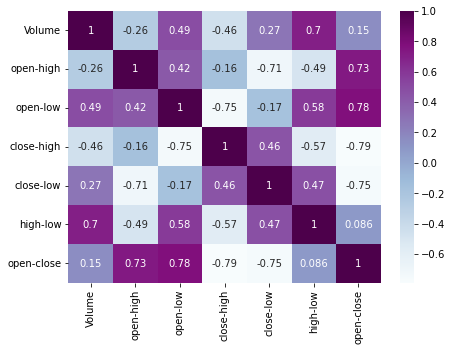

In [10]:
plt.figure(figsize=(7,5))
sns.heatmap(data=data2.corr(), cmap='BuPu', annot=True)

**The main variable we are going to focus on in this dataset is the ‘Volume’. Variables having a large correlation value with volume represent that those numbers might have intrigued a large number of buyers and sellers. Correlation between those features and the volume feature will tell us how a change in that feature impacts the number of stocks traded that day.**

**The close-high shows the most negative correlation with the volume feature. This means that the greater the difference between the closing value of the stock and the highest value of stock that day, the lesser will be the stocks traded that day since people would want to hold that stock considering a positive sentiment. 
On the other hand, open-low shows the most positive correlation with volume, indicative of the fact that higher the difference between the opening and lowest price of the stock, higher will be the volume of stocks traded as more buyers would want to sell that stock in a pessimistic environment.**

## Data Visualization

### Plotting the Candlestick Chart 

In [11]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots and mention plot grid size
figure = make_subplots(rows=2, cols=1, shared_xaxes=True, 
               vertical_spacing=0.05, subplot_titles=('Alphabet Inc. (GOOG) | Open-High-Low-Close Price', 'Volume'), 
               row_width=[0.3, 0.7])

# Plot OHLC on 1st row
figure.add_trace(go.Candlestick(x=data["Date"], open=data["Open"], high=data["High"],
                low=data["Low"], close=data["Close"], name="OHLC"),
                row=1, col=1)

# Bar trace for volumes on 2nd row without legend
figure.add_trace(go.Bar(x=data['Date'], y=data['Volume'], showlegend=False), row=2, col=1)

# Do not show OHLC's rangeslider plot 
figure.update(layout_xaxis_rangeslider_visible=False)
figure.show()

In [12]:
min1 = np.min(data['Close'])
max1 = np.max(data['Close'])
avg1 = np.mean(data['Close'])

print(f'The minimum closing price of GOOGLE stock was {round(min1, 2)}')
print(f'The maximum closing price of GOOGLE stock was {round(max1, 2)}')
print(f'The average closing price of GOOGLE stock was {round(avg1, 2)}')

The minimum closing price of GOOGLE stock was 2116.79
The maximum closing price of GOOGLE stock was 3014.18
The average closing price of GOOGLE stock was 2686.04


**Since we are particularly interested in the close price and date variable from the dataset, so we'll just copy these two variables into a new dataset**

In [13]:
df = data[['Date', 'Close']]
df

Date        Close
0    2021-06-30  2506.320068
1    2021-07-01  2527.370117
2    2021-07-02  2574.379883
3    2021-07-06  2595.419922
4    2021-07-07  2601.550049
..          ...          ...
247  2022-06-23  2253.689941
248  2022-06-24  2370.760010
249  2022-06-27  2332.449951
250  2022-06-28  2251.429932
251  2022-06-29  2245.129883

[252 rows x 2 columns]

**We need to group data for better understanding to it is advised to convert Date column into 'Datetime' type and extract needful information.**

In [14]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df.dtypes

Date     datetime64[ns]
Close           float64
Year              int64
Month             int64
dtype: object

In [15]:
df1= df.groupby(['Date'])['Close'].mean()
print(df1.head(10))

Date
2021-06-30    2506.320068
2021-07-01    2527.370117
2021-07-02    2574.379883
2021-07-06    2595.419922
2021-07-07    2601.550049
2021-07-08    2583.540039
2021-07-09    2591.489990
2021-07-12    2611.280029
2021-07-13    2619.889893
2021-07-14    2641.649902
Name: Close, dtype: float64


### Plotting the Closing price against Years

<AxesSubplot:title={'center':'Closing price in Months (06/2017-06/2022)'}, xlabel='Year', ylabel='Price'>

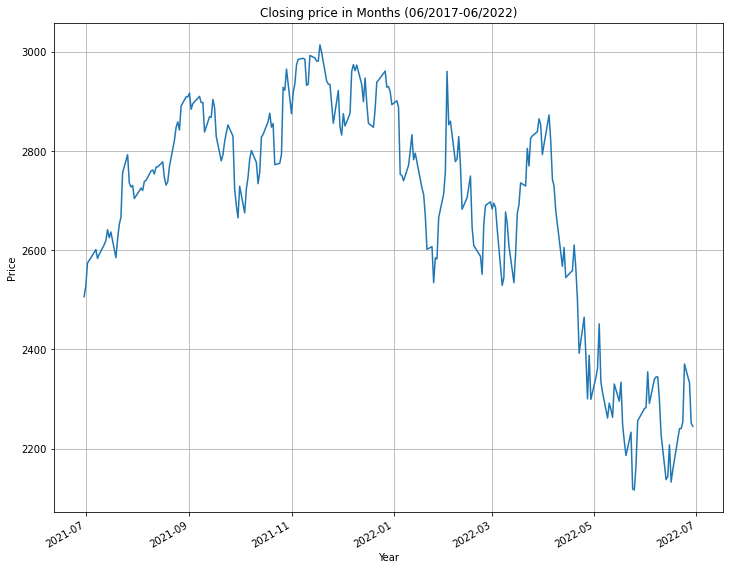

In [16]:
df1.plot(figsize=(12,10), title="Closing price in Months (06/2017-06/2022)", grid=True, ylabel='Price', xlabel= 'Year')

**It is evident that since the beginning of 2022, the average price of the Google share has been declining, passing the previous lows. This fall can be attributed to the shaky economic conditions in the global financial markets.**

### Plotting the Kernel Density Estimate (KDE) Chart for the target variable

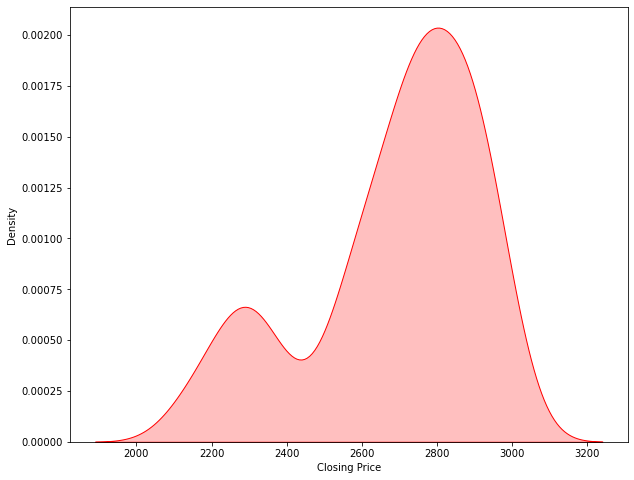

In [17]:
plt.figure(figsize=(10,8))
sns.kdeplot(df['Close'], color='red', shade='True')
plt.xlabel('Closing Price')
plt.show()

**The KDE chart visualizes the distribution of observations in the dataset. Here, as it is shown, the closing price data points are highly concentrated between 2500-3000 interval, reaching the peak at 2800 while touching the 3200 point at the right extreme part.**

## Stationarity

**Stationarity in a time-series data is a very important feature as it becomes relatively easier and statistically more accurate to apply time series methodologies on a stationary series and thus derive the business decisions. A data is said to be stationary if the mean, variance and autocorrelation structure do not show any difference over time. In other words, the data should not contain any trends or seasonality and has to show a constant variance and autocorrelation structure over time.
We will use ADF Test to acertain the stationarity of the Closing Price series.**

### Augmented Dickey-Fuller (ADF) TEST

**The Augmented Dickey-Fuller Test (ADF) is a stationarity unit root test. The null hypothesis of ADF test is that series is non-stationary. Since ADF statistic is greater than critical values, we cannot reject the null hypothesis. Hence, this imply that the series is non-stationary.**

In [18]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    ADF=adfuller(series)
    print(f'ADF Statistic is: {ADF[0]}')
    print(f'p-value is: {ADF[1]}')
    print(f'Number of lags: {ADF[2]}')
    print(f'Number of obs: {ADF[3]}')
    print(f'Critical Values: {ADF[4]}')
    if ADF[1] <= 0.05:
        print("Strong evidence against null hypothesis, so we reject null hypothesis")
    else:
        print("Weak evidence against null hypothesis implying we fail to reject null hypothesis")
        
adf_test(df['Close'])

ADF Statistic is: -1.2761367131287165
p-value is: 0.6400178665501057
Number of lags: 0
Number of obs: 251
Critical Values: {'1%': -3.4566744514553016, '5%': -2.8731248767783426, '10%': -2.5729436702592023}
Weak evidence against null hypothesis implying we fail to reject null hypothesis


### Plotting the rolling statistics against original series

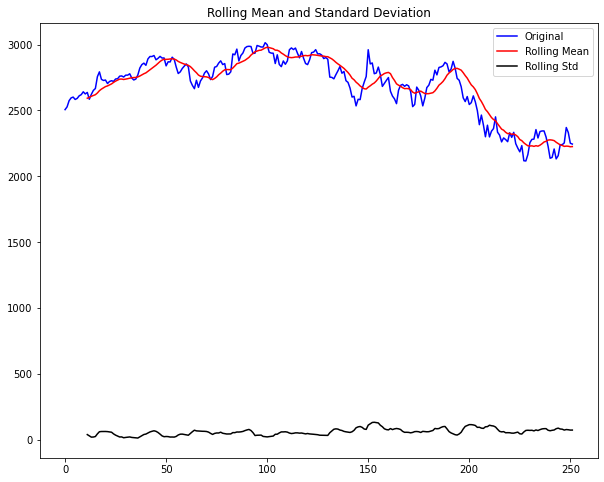

In [19]:
rolling_mean = df['Close'].rolling(12).mean()
rolling_std = df['Close'].rolling(12).std()

#Plot rolling statistics:
plt.figure(figsize=(10,8))
plt.plot(df['Close'], color='blue',label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label = 'Rolling Std')
plt.legend()
plt.title('Rolling Mean and Standard Deviation')
plt.show()

**Through the above graph, we can see that standard deviation is fairly constant in the series but increasing mean implies the non-stationarity of the series.**

### Tranforming the series into Stationary

**There are multiple ways of transforming the a non-stationary series into stationary:**
1. Differencing
2. Scale transformation : Using log or sqaure root of the data
3. Seasonal Decomposition

#### First Differencing

In [20]:
df['Close_FD'] = df['Close']-df['Close'].shift(1)
df['Close_FD'].isnull().sum()

1

In [21]:
df['Close_FD'] = df['Close_FD'].fillna(0)

In [22]:
adf_test(df['Close_FD'])

ADF Statistic is: -16.43449934023567
p-value is: 2.4606795143354328e-29
Number of lags: 0
Number of obs: 251
Critical Values: {'1%': -3.4566744514553016, '5%': -2.8731248767783426, '10%': -2.5729436702592023}
Strong evidence against null hypothesis, so we reject null hypothesis


<AxesSubplot:title={'center':'First Difference of Closing Price'}>

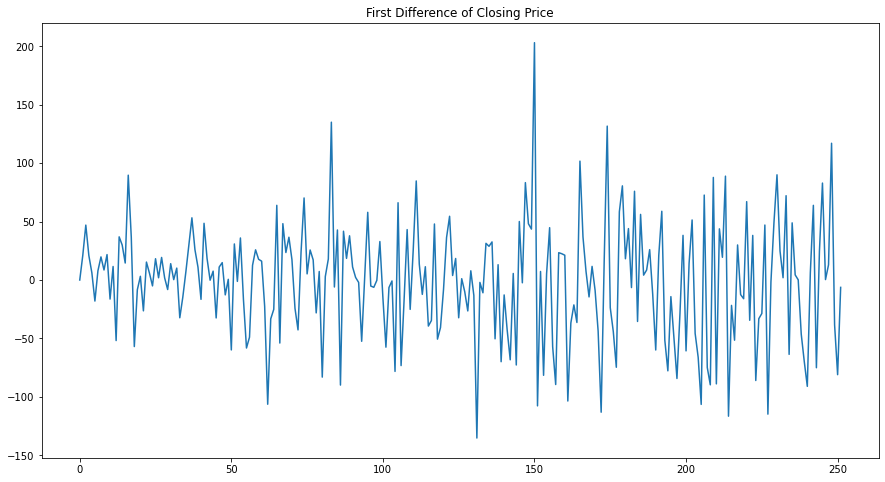

In [23]:
df['Close_FD'].plot(figsize=(15,8), title= "First Difference of Closing Price")

**After first differencing we got the stationarity in the closing price.**

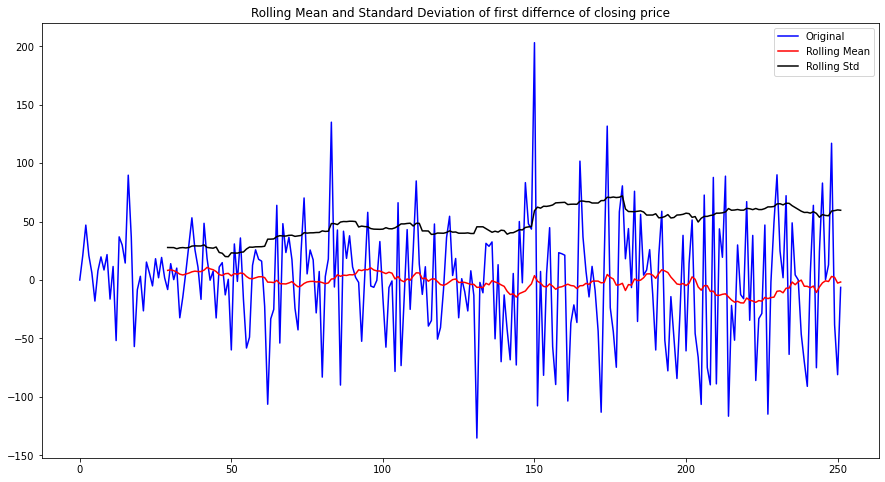

In [24]:
FDrolling_mean = df['Close_FD'].rolling(30).mean()
FDrolling_std = df['Close_FD'].rolling(30).std()

#Plot rolling statistics:
plt.figure(figsize=(15,8))
plt.plot(df['Close_FD'], color='blue',label='Original')
plt.plot(FDrolling_mean, color='red', label='Rolling Mean')
plt.plot(FDrolling_std, color='black', label = 'Rolling Std')
plt.legend()
plt.title('Rolling Mean and Standard Deviation of first differnce of closing price')
plt.show()

**The rolling mean and standard deviation are in line with the average trend in the series.**

#### Seasonal Decomposition

**Seasoanlity is a cyclic event that occurs in time series for a short time and causes the increasing or decreasing patterns for a short time in a time series. There are two types of seasonality:**

**-Additive time series: In this, the components of the time series are added together to make the time series. Visually, the increasing or decreasing pattern of the time series is similar throughout the series.**

**-Multiplicative time series: In this, the components of the time series are multiplicative together. Visually, the time series is having exponential growth or decrement with time.**

<Figure size 432x288 with 0 Axes>

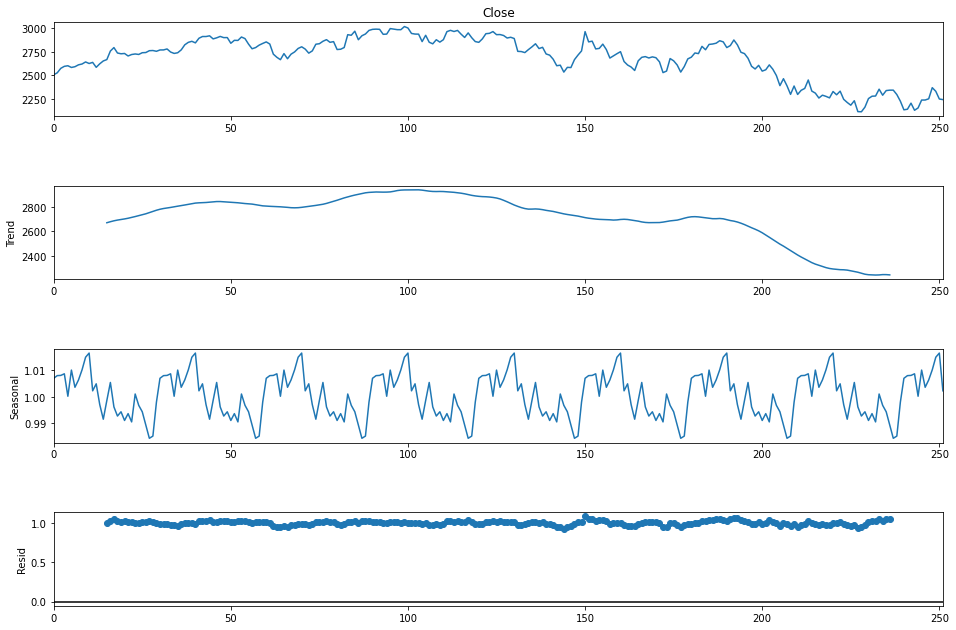

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"], 
                            model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

**As we see, the data contains the seasonality which we can capture using SARIMA model.**

## ACF and PACF
**The  autocorrelation function is the amount of correlation between a variable and a lag of itself whereas the partial autocorrelation is the amount of correlation between a variable and a lag of itself that is not explained by correlations at all lower-order-lags.
ACF determines the order of MA part while PACF determines the AR part of the ARIMA model.**

<function matplotlib.pyplot.show(close=None, block=None)>

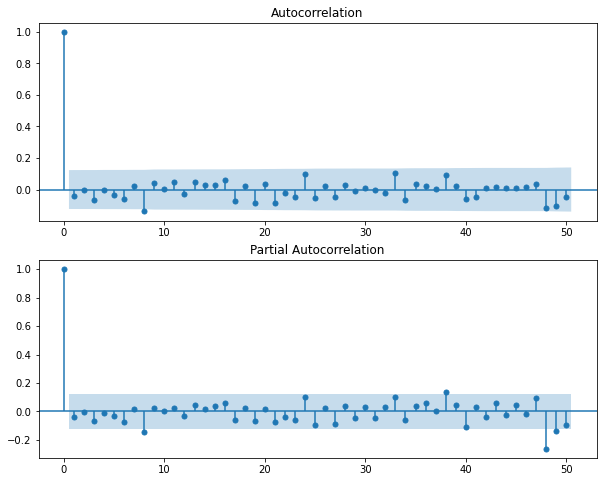

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

figure = plt.figure(figsize=(10,8))
ax1 = figure.add_subplot(2,1,1)
figure = plot_acf(df['Close_FD'], lags=50, ax=ax1)
ax2 = figure.add_subplot(2,1,2)
figure = plot_pacf(df['Close_FD'], lags=50, ax=ax2)
plt.show

**According to the ACF and PACF graphs, the ARIMA model of (5,1,2) would be the appropriate one for our analysis. However, to ascertain the parameters, we will use auto ARIMA model in the next section.**

## Training and Testing Data

In [27]:
#Splitting data into training and testing
n = int(len(df)*0.8)
train_data =df.loc[:n, ["Close", "Date"]]
test_data = df.loc[n+1:, ["Close", "Date"]]
len(train_data), len(test_data)

(202, 50)

In [28]:
#set index to date column 
train_data.set_index('Date', inplace=True)
test_data.set_index('Date', inplace=True)
train_data.dtypes

Close    float64
dtype: object

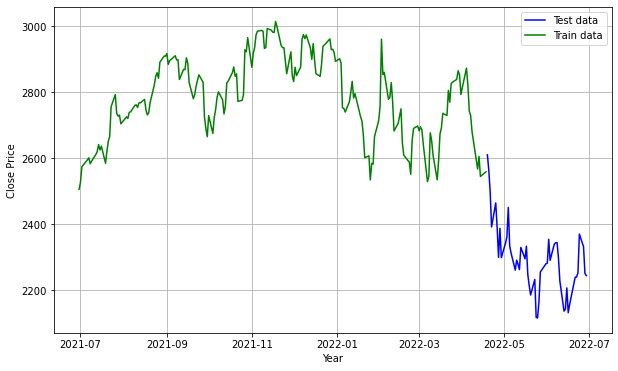

In [29]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.plot(test_data, 'blue', label='Test data')
plt.plot(train_data, 'green', label='Train data')

plt.legend()

## ARIMA Model

**In this stage, we have to determine the optimum parameters for ARIMA model.The auto arima function returns a fitted ARIMA model after determining the most optimal parameters for an ARIMA model. The optimum model for forecasting is the model whose AIC value is the lowest.**

### Building the Model

In [30]:
#Building the model with derived parameters
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(train_data, order=(5,1,2))
fitted = model.fit(disp=-1)
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                  201
Model:                 ARIMA(5, 1, 2)   Log Likelihood               -1053.202
Method:                       css-mle   S.D. of innovations             45.636
Date:                Tue, 05 Jul 2022   AIC                           2124.403
Time:                        12:16:57   BIC                           2154.133
Sample:                             1   HQIC                          2136.433
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2107      2.947      0.072      0.943      -5.564       5.986
ar.L1.D.Close    -0.5593      1.403     -0.399      0.690      -3.308       2.190
ar.L2.D.Close    -0.0470      0.768     -0.061      0.951      -1.552       1.457
ar.L3.D.Close    -0.1083      0.084     -1.293      0.196      -0.273       0.056
ar.L4.D.Close    -0.1064      0.177     -0.602      0.547      -0.453       0.240
ar.L5.D.Close     0.0269      0.183      0.147      0.883      -0.331       0.385
ma.L1.D.Close     0.5704      1.403      0.407      0.684      -2.179       3.319
ma.L2.D.Close     0.0696      0.773      0.090      0.928      -1.446       1.585
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3215           -0.6534j            1.4742           -0.4269
AR.2           -1.3215           +0.6534j            1.4742            0.4269
AR.3            0.7777           -1.6697j            1.8420           -0.1806
AR.4            0.7777           +1.6697j            1.8420            0.1806
AR.5            5.0396           -0.0000j            5.0396           -0.0000
MA.1           -2.5397           +0.0000j            2.5397            0.5000
MA.2           -5.6608           +0.0000j            5.6608            0.5000
-----------------------------------------------------------------------------
"""

### Predictions

In [31]:
prediction = pd.DataFrame(fitted.predict())
prediction.columns = ['Predicted_Price']
print(prediction)

            Predicted_Price
Date                       
2021-07-01         0.210723
2021-07-02         0.421919
2021-07-06         0.890981
2021-07-07        -1.436500
2021-07-08        -5.755208
...                     ...
2022-04-11        12.804918
2022-04-12        -0.919283
2022-04-13         2.534360
2022-04-14        12.748690
2022-04-18         3.842023

[201 rows x 1 columns]


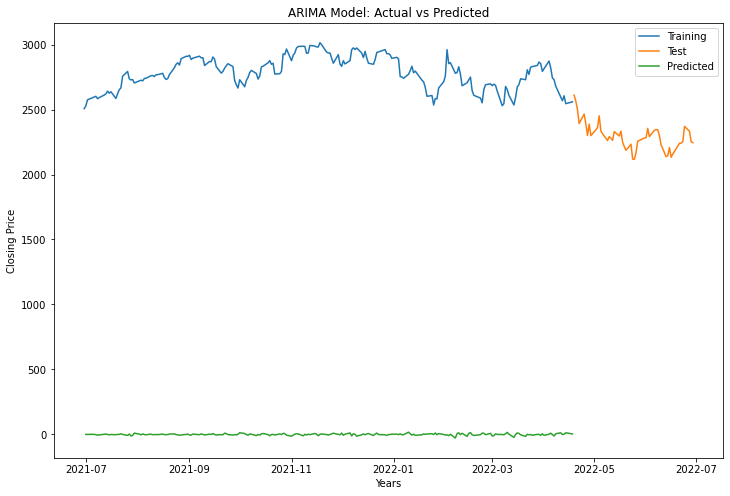

In [41]:
plt.figure(figsize=(12,8))
plt.plot(train_data, label="Training")
plt.plot(test_data, label="Test")
plt.plot(prediction, label="Predicted")
plt.xlabel("Years")
plt.ylabel("Closing Price")
plt.title("ARIMA Model: Actual vs Predicted")
plt.legend()
plt.show()

**Clearly, the ARIMA model has failed in predicting the stock prices since the data is featured with seasonality with can be only be captured using SARIMA model.**

## SARIMA Model

### Building the Model

In [33]:
import statsmodels.api as sm
import warnings

p, d, q = 5, 1, 2
model1=sm.tsa.statespace.SARIMAX(df['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
fitted1=model1.fit()
print(fitted1.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  252
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -1287.636
Date:                            Tue, 05 Jul 2022   AIC                           2605.271
Time:                                    12:17:19   BIC                           2657.418
Sample:                                         0   HQIC                          2626.285
                                            - 252                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1192      0.322     -0.370      0.712      -0.751       0.513
ar.L2          0.8790      0.345   

### Predictions

In [34]:
prediction1 = pd.DataFrame(fitted1.predict())
prediction1.columns = ['Predicted_Price']
prediction1

Predicted_Price
0           0.000000
1        2505.994906
2        2527.342887
3        2574.002566
4        2595.386725
..               ...
247      2218.103637
248      2233.713741
249      2364.444854
250      2312.578243
251      2234.247208

[252 rows x 1 columns]

In [35]:
#Find and dropping the outliers
prediction1.min
prediction1 = prediction1.replace(0, pd.np.nan).dropna(axis=0).fillna(0).astype(int)

In [36]:
#Find and dropping the outliers
prediction1.max()
prediction1 = prediction1.replace(3889, pd.np.nan).dropna(axis=0).fillna(0).astype(int)

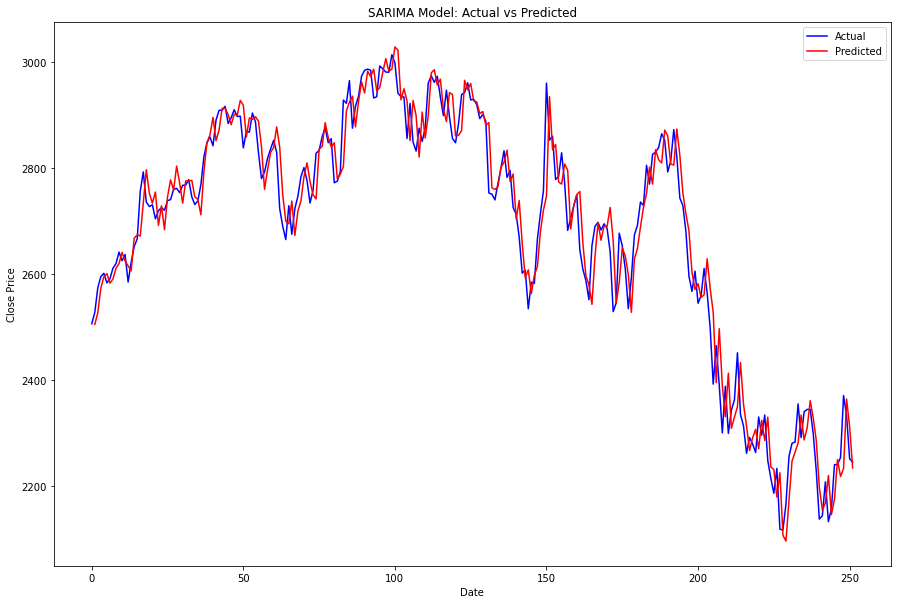

In [42]:
plt.figure(figsize=(15,10))
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('SARIMA Model: Actual vs Predicted')
plt.plot(df['Close'], 'blue', label='Actual')
plt.plot(prediction1, 'red', label='Predicted')

plt.legend()

### Forecasting next 30 days price

In [38]:
forecast = fitted1.predict(len(df), len(df)+30)
print(forecast)

252    2233.748249
253    2265.247578
254    2272.151696
255    2296.817276
256    2313.956242
257    2322.751482
258    2325.286569
259    2314.575462
260    2302.678026
261    2289.973173
262    2286.039182
263    2269.957220
264    2247.158455
265    2256.199128
266    2278.185595
267    2283.820086
268    2278.470711
269    2306.507605
270    2303.351740
271    2310.989751
272    2317.376297
273    2313.843154
274    2283.882831
275    2291.990177
276    2269.357118
277    2272.542178
278    2272.769184
279    2281.038296
280    2285.375325
281    2294.886585
282    2300.866856
Name: predicted_mean, dtype: float64


Text(0.5, 1.0, 'SARIMA Model: Forecast for next 30 days')

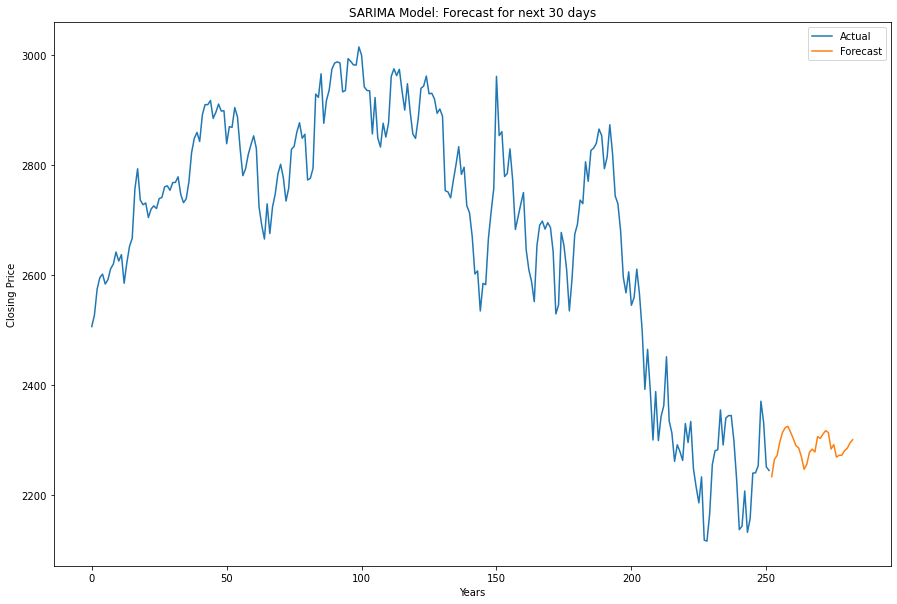

In [43]:
df["Close"].plot(legend=True, label="Actual", figsize=(15, 10))
forecast.plot(legend=True, label="Forecast")
plt.xlabel('Years')
plt.ylabel('Closing Price')
plt.title('SARIMA Model: Forecast for next 30 days')